# Define function to read flat file

In [1]:
def read_flat_file(path,parse_dates,nrows=None):
    import pandas as pd
    df = pd.read_csv(path,nrows=5000)
    num_unique = df.nunique()
    types = df.dtypes
    #col_dict = {col:str(typeof) if n<=2 else 'uint8'  for n, col,typeof in zip(num_unique.values.tolist()
                                            # ,num_unique.index.tolist(),df.dtypes)}
    col_dict = {}
    for col,data_type in zip(num_unique.index, types):
        
        
        
        if 'float' in str(data_type):
            col_dict[col] = "float32"
        if ('int' in str(data_type)) & ('uint' not in str(data_type) ):
            col_dict[col]= 'int32'
        
        if ('float' not in str(data_type)) & ('int' not in str(data_type)):
            col_dict[col]=str(data_type)
    df = pd.read_csv(path, usecols=list(col_dict), dtype=col_dict, parse_dates = parse_dates, nrows=nrows)
    return df

In [2]:
import pandas as pd
taxi_train = read_flat_file('data/train_5wwl.csv', parse_dates = ['full_dates'])
taxi_train.head()

dz         db dtaxid     pz         pb ptaxid  fare_amount  \
0    7.0     Queens    1.0  137.0  Manhattan    4.0        14.60   
1   68.0  Manhattan    4.0   79.0  Manhattan    4.0        11.40   
2  242.0      Bronx    1.0  138.0     Queens    0.0        31.15   
3  114.0  Manhattan    4.0  100.0  Manhattan    4.0         7.80   
4  148.0  Manhattan    4.0  161.0  Manhattan    4.0        13.30   

   passenger_count  time_div  year        ...         snowProbability  \
0                1         0  2009        ...                     0.0   
1                1         0  2009        ...                     0.0   
2                1         0  2009        ...                     0.0   
3                2         0  2009        ...                     0.0   
4                2         0  2009        ...                     0.0   

   l_rainIntensity  l_sleetAccumulation  l_sleetIntensity l_snowAccumulation  \
0              0.0                  0.0               0.0                0.0   
1              0.0                  0.0               0.0                0.0   
2              0.0                  0.0               0.0                0.0   
3              0.0                  0.0               0.0                0.0   
4              0.0                  0.0               0.0                0.0   

   l_snowIntensity  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              0.0        -73.972481        40.742744         -73.918938   
1              0.0        -73.983978        40.721737         -73.994987   
2              0.0        -73.862801        40.768948         -73.860603   
3              0.0        -73.987877        40.753090         -74.001640   
4              0.0        -73.979713        40.760426         -73.990799   

   dropoff_latitude  
0         40.764496  
1         40.750137  
2         40.846359  
3         40.729389  
4         40.718323  

[5 rows x 34 columns]

In [3]:
taxi_train.drop(['full_dates'], axis = 1, inplace = True)
factors = ['dz','db','pb','pz','dtaxid','ptaxid','time_div','month']
taxi_train[factors] = taxi_train[factors].astype('category')
taxi_train = pd.get_dummies(taxi_train)
taxi_train.head()

fare_amount  passenger_count  year  day     degrees  distance  temperature  \
0        14.60                1  2009    3   61.782028  3.185356    20.639999   
1        11.40                1  2009    3  -16.365881  2.043118    20.639999   
2        31.15                1  2009    3    1.230047  5.342908    20.639999   
3         7.80                2  2009    3 -156.245758  1.787835    20.639999   
4        13.30                2  2009    3 -168.713959  2.962889    20.639999   

   visibility  rainIntensity  rainProbability    ...     month_3  month_4  \
0        9.74            0.0              0.0    ...           0        0   
1        9.74            0.0              0.0    ...           0        0   
2        9.74            0.0              0.0    ...           0        0   
3        9.74            0.0              0.0    ...           0        0   
4        9.74            0.0              0.0    ...           0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0        0        0         0         0         0  
1        0        0        0        0        0         0         0         0  
2        0        0        0        0        0         0         0         0  
3        0        0        0        0        0         0         0         0  
4        0        0        0        0        0         0         0         0  

[5 rows x 625 columns]

In [4]:
valid = read_flat_file('data/train_2wwl.csv',parse_dates = ['full_dates'])
valid.drop(['full_dates'], axis = 1, inplace = True)

valid[factors] = valid[factors].astype('category')
valid = pd.get_dummies(valid)


In [5]:
import pandas as pd
taxi_test = read_flat_file('data/test_3wwl.csv', parse_dates = ['full_dates'])
taxi_test.drop(['full_dates'], axis = 1, inplace = True)

taxi_test[factors] = taxi_test[factors].astype('category')
taxi_test = pd.get_dummies(taxi_test)

taxi_test.head()

fare_amount  passenger_count  year  day     degrees  distance  temperature  \
0     5.800000                1  2009    3   39.817879  1.180034    20.639999   
1    17.700001                2  2009    3 -145.704269  3.317575    20.639999   
2     4.500000                4  2009    3    0.790904  0.721573    20.639999   
3     8.200000                1  2009    3  101.410622  0.634183    20.639999   
4    14.200000                2  2009    3   27.519135  3.568482    20.639999   

   visibility  rainIntensity  rainProbability    ...     month_3  month_4  \
0        9.74            0.0              0.0    ...           0        0   
1        9.74            0.0              0.0    ...           0        0   
2        9.74            0.0              0.0    ...           0        0   
3        9.74            0.0              0.0    ...           0        0   
4        9.74            0.0              0.0    ...           0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0        0        0         0         0         0  
1        0        0        0        0        0         0         0         0  
2        0        0        0        0        0         0         0         0  
3        0        0        0        0        0         0         0         0  
4        0        0        0        0        0         0         0         0  

[5 rows x 626 columns]

In [6]:
final_col_list = [col for col in list(taxi_train) if (col in list(valid)) & (col in list(taxi_test))]

In [7]:
taxi_train = valid[final_col_list]
valid = valid[final_col_list]
taxi_test = taxi_test[final_col_list]

In [8]:
import lightgbm as lgb

/Users/robertwoody/anaconda3/envs/pyviz5/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [ ]:
params = {'max_depth':8,
         'boosting_type':'gbdt',
         'num_leaves': 50,
          'metric':'l2_root',
         'learning_rate': .1,
         'feature_fraction':.9,
           'bagging_fraction':.8,
         'verbose':0,
         'bin_construct_sample_cnt':500000}
#min_data_in_leaf
#dart
#save binary to speed up future loading
#lambda_l1, lambda_l2
#min_gain_to_split
#max_bin

In [27]:

lgb_train = lgb.Dataset(taxi_train.drop('fare_amount',axis = 1),taxi_train['fare_amount'])
lgb_valid = lgb.Dataset(valid.drop('fare_amount',axis = 1),valid['fare_amount'])

In [ ]:
import time


#start time
lgbm = lgb.train(params,
                lgb_train,
                num_boost_round = 400,
                valid_sets = lgb_valid,
                early_stopping_rounds = 15)
#end time

In [29]:
y_pred = lgbm.predict(taxi_train.drop('fare_amount',axis = 1), num_iterations = lgbm.best_iteration)

In [30]:
rmse = (sum(((y_pred-taxi_train['fare_amount'])**2)/len(y_pred)))**.5
rmse

5.261744658259558

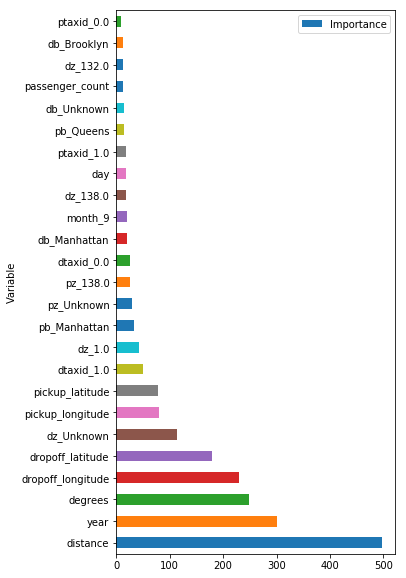

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize = (5,5))
results = pd.DataFrame([list(lgbm.feature_name()),list(lgbm.feature_importance())]).transpose().sort_values(by = 1,ascending = False)
results.rename(columns = {0:"Variable",1:'Importance'},inplace=True)
plot_df = results.loc[results.index[0:25],:].reset_index(drop=True)
plot_df.plot(kind='barh',x="Variable",y="Importance" ,figsize = (5,10))

In [32]:
results.head()

Variable Importance
4            distance        498
1                year        301
3             degrees        249
22  dropoff_longitude        230
23   dropoff_latitude        180

In [34]:

y_pred = lgbm.predict(taxi_test.drop('fare_amount',axis = 1), num_iterations = lgbm.best_iteration)

In [35]:
rmse = (sum(((y_pred-taxi_test['fare_amount'])**2)/len(y_pred)))**.5
rmse

5.3863761014749745